In [75]:
import numpy as np
import matplotlib.pylab as plt


algos = [
    "GD",
    "LRA-GD",
    "Adam",
    "MultiAdam",
    "ENGD",
    "MultiENGD",
]

datas = [np.load("data/" + algo.lower() + ".npy") for algo in algos]
u_star = [np.load("data/" + algo.lower() + "/u-star.npy") for algo in algos]
u_theta = [np.load("data/" + algo.lower() + "/u-theta.npy") for algo in algos]
errors = [np.abs(s - t) for s, t in zip(u_star, u_theta)]

In [76]:
def prettyplot(ncols, nplots, **kwargs):
    ratio = nplots / ncols
    nrows = int(np.ceil(ratio))

    fig = plt.figure(**kwargs)
    fig.tight_layout()

    axs = np.array([plt.subplot(nrows, ncols, i+1) for i in range(nplots)])

    if (ncells := nrows * ncols) != nplots:
        diff = ncells - nplots

        for i in range(-1, diff - ncols - 1, -1):
            box = axs[i].get_position()
            shift = 0.5 * diff * box.width
            box.x0 += shift
            box.x1 += shift
            axs[i].set_position(box)

    return fig, axs

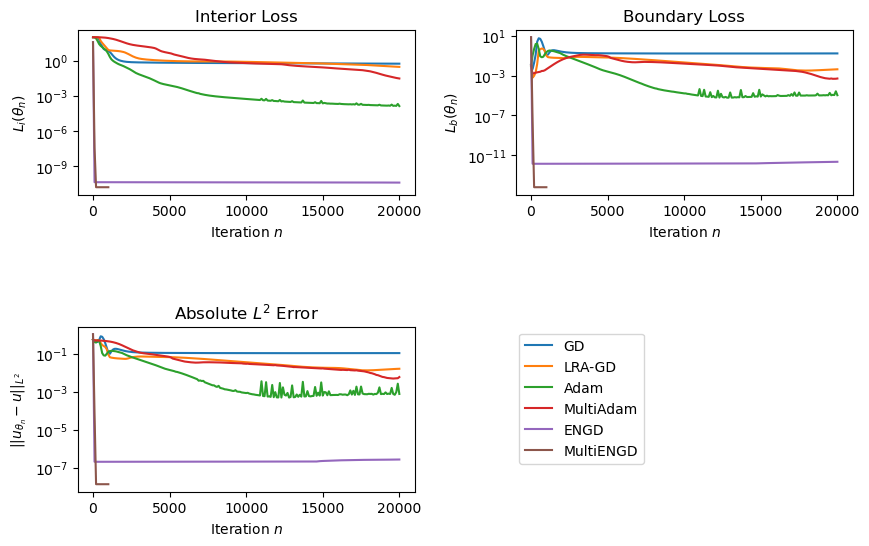

In [77]:
# Losses
fig, (intax, bdryax, l2ax) = prettyplot(2, 3, figsize=(10, 6))

ticks = np.linspace(0, 20000, 5)

intax.set_title("Interior Loss")
intax.set_xlabel(r"Iteration $n$")
intax.set_ylabel(r"$L_{i}\left(\theta_{n}\right)$")
intax.set_yscale("log")
intax.set_xticks(ticks)
# intax.set_xlim(0, 10000)

bdryax.set_title("Boundary Loss")
bdryax.set_xlabel(r"Iteration $n$")
bdryax.set_ylabel(r"$L_{b}\left(\theta_{n}\right)$")
bdryax.set_yscale("log")
bdryax.set_xticks(ticks)
# bdryax.set_xlim(0, 10000)

l2ax.set_title(r"Absolute $L^2$ Error")
l2ax.set_xlabel(r"Iteration $n$")
l2ax.set_ylabel(r"$\|\|u_{\theta_{n}} - u\|\|_{L^{2}}$")
l2ax.set_yscale("log")
l2ax.set_xticks(ticks)
# l2ax.set_xlim(0, 10000)

omit = [
    # "GD",
    # "Adam",
    # "ENGD",
    # "LRA",
    # "MultiAdam",
]

for algo, data in zip(algos, datas):
    if algo in omit:
        continue
    intax.plot(data[data[:, 0] % 100 == 0, 0], data[data[:, 0] % 100 == 0, 1], label=algo)
    bdryax.plot(data[data[:, 0] % 100 == 0, 0], data[data[:, 0] % 100 == 0, 2], label=algo)
    l2ax.plot(data[data[:, 0] % 100 == 0, 0], data[data[:, 0] % 100 == 0, 3], label=algo)
    
plt.legend(bbox_to_anchor=(1.7, 1.))
# l2ax.legend(loc="lower left", fontsize=9)
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.savefig("data/loss.pdf", bbox_inches='tight')

In [78]:
# # Losses
# fig, (intax, bdryax, l2ax) = prettyplot(3, 3, figsize=(12, 3))
# 
# intax.set_title("Interior Loss")
# intax.set_xlabel(r"Iteration $n$")
# intax.set_ylabel(r"$L_{i}\left(\theta_{n}\right)$")
# intax.set_yscale("log")
# # intax.set_xlim(0, 10000)
# 
# bdryax.set_title("Boundary Loss")
# bdryax.set_xlabel(r"Iteration $n$")
# bdryax.set_ylabel(r"$L_{b}\left(\theta_{n}\right)$")
# bdryax.set_yscale("log")
# # bdryax.set_xlim(0, 10000)
# 
# l2ax.set_title(r"$L^2$ Error")
# l2ax.set_xlabel(r"Iteration $n$")
# l2ax.set_ylabel(r"$\|\|u_{\theta_{n}} - u\|\|_{L^{2}}$")
# l2ax.set_yscale("log")
# # l2ax.set_xlim(0, 10000)
# 
# idx = 11
# 
# for algo, data in zip(algos, datas):
#     if algo in omit:
#         intax.plot(data[:idx, 0], data[:idx, 1], label=algo, color="purple")
#         bdryax.plot(data[:idx, 0], data[:idx, 2], label=algo, color="purple")
#         l2ax.plot(data[:idx, 0], data[:idx, 3], label=algo, color="purple")
#     
# # plt.legend(bbox_to_anchor=(2., 1.))
# plt.subplots_adjust(hspace=0.6, wspace=0.6)
# plt.savefig("data/loss-engd.pdf", bbox_inches='tight')

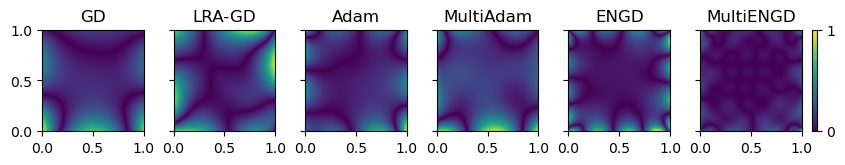

In [79]:
from mpl_toolkits.axes_grid1 import AxesGrid

# |u_theta - u|
# fig, axs = prettyplot(len(algos), len(algos), figsize=(10, 4))

fig = plt.figure(figsize=(10, 2))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, len(algos)),
                axes_pad=0.3,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

extent=[0,1,0,1]
ticks = [0.0, 0.5, 1.0]

for algo, s, t, ax in zip(algos, u_star, u_theta, grid):
    ax.set_title(algo)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    z = np.abs(s - t) / np.max(np.abs(s - t))
    im = ax.imshow(z, extent=extent, vmin=0, vmax=1)

# plt.colorbar(im, ax=axs, shrink=0.5, pad=2., ticks=[0,1], orientation="horizontal")
cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im, ticks=[0, 1])

plt.subplots_adjust(hspace=0.0, wspace=0.4)
plt.savefig("data/errors.pdf")